In [111]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
from dgutils import colors as colortools
from dgutils import savehtml
from pimcscripts import pimchelp

# Notebook display options
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#sorted(plt.style.available)
plt.style.use('classic')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Reduce the data over temperature and laod the resulting files

In [112]:
sim_params = {'τ':0.02, 'N':5, 'n':0.5}

In [113]:
root_dir = f"./{sim_params['τ']}/{sim_params['N']}/"
data_dir = root_dir + 'data/'
plot_dir = root_dir + 'plot/'

!reduce-one.py -r T -N {sim_params['N']} -s 0.2 -n {sim_params['n']} -t {sim_params['τ']} --canonical {data_dir}

Reduced estimator over 4 Temperature value(s).
Reduced lineardensity over 4 Temperature value(s).


In [114]:
est_reduce_name = pimchelp.get_reduce_name(**sim_params,canonical=True,reduce='T', estimator='estimator')
estimator = pimchelp.PIMCResults(f'{data_dir}{est_reduce_name}')
rho_reduce_name = pimchelp.get_reduce_name(**sim_params,canonical=True,reduce='T',estimator='lineardensity')
rho = pimchelp.PIMCResults(f'{data_dir}{rho_reduce_name}')

## Study the Energy vs. Temperature

In [115]:
E = lambda T: sim_params['N'] * 0.5/np.tanh(0.5/T)
_T = np.linspace(1E-6,2,1000)

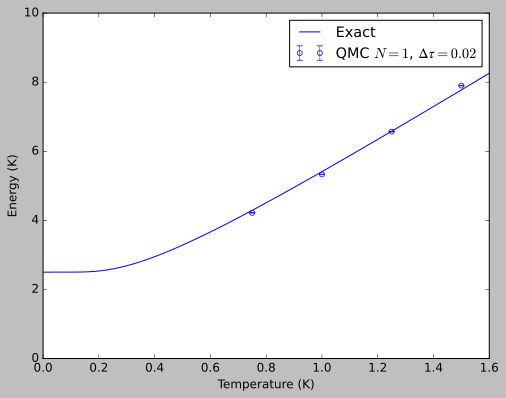

In [119]:
params = {'mfc':'None', 'elinewidth':0.5, 'marker':'o', 'ms':5, 'lw':0.75, 'ls':'None', 'mew':0.75, 'mec':colors[0]}

T = estimator.data['T']
plt.errorbar(T, estimator.data['E'], yerr=estimator.data['ΔE'], **params, label=f"QMC $N=1$, $Δτ={sim_params['τ']}$")
plt.plot(_T, E(_T), lw=1, color=colors[0], label='Exact')
plt.xlim(0,1.6)
plt.ylim(0.0,2*sim_params["N"])
plt.ylabel('Energy (K)')
plt.xlabel('Temperature (K)')
plt.legend()
plt.savefig(plot_dir+f'E_vs_T_SHO_N{sim_params["N"]}.png', dpi=300)

## Investigate the probaility density

In [117]:
rho_exact = lambda x,T: np.exp(-x**2*np.tanh(0.5/T))/np.sqrt(np.pi/np.tanh(0.5/T))
_x = np.linspace(-5,5,1001)

-0.05
0.0


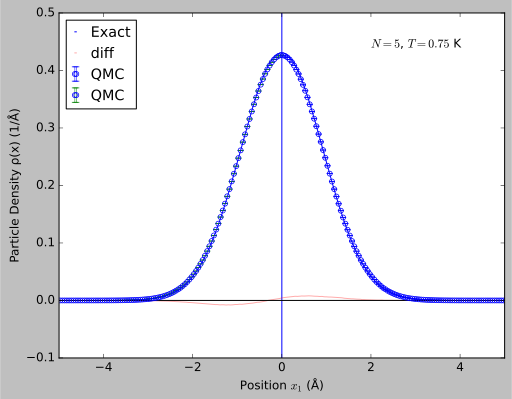

In [123]:
params = {'mfc':'None', 'elinewidth':0.5, 'marker':'o', 'ms':5, 'lw':0.75, 'ls':'None', 'mew':0.75, 'mec':colors[0]}

T_compare = 0.75
idx = np.where(np.abs(T-T_compare) < 0.01)[0][0]
x,rhox,drhox = rho.epdata(rho.params[idx])
norm = scipy.integrate.simps(rhox,x)
deltaX = x[2] - x[1]

fig,ax = plt.subplots()

idx_plus = np.where(x >= 0)
idx_minus = np.where(x < 0)
ax.errorbar(x[idx_plus]+deltaX/2,rhox[idx_plus]/norm,yerr=drhox[idx_plus],**params, label=f'QMC')
ax.errorbar(x[idx_minus]+deltaX/2,rhox[idx_minus]/norm,yerr=drhox[idx_minus],**params, label=f'QMC')

#ax.errorbar(x+deltaX/2,rhox/norm,yerr=drhox,**params, label=f'QMC')

#w = np.argmax(rhox)
#print(x[w])

#z = np.argmax(rho_exact(_x, T_compare))
#print(_x[z])

diff = rho_exact(x, T_compare) - rhox/norm

ax.axvline(x=0)

ax.plot(_x, rho_exact(_x, T_compare), '-', lw=1, color=colors[0], label = 'Exact')

plt.plot(x, diff, alpha=0.33, label='diff')
ax.axhline(y=0,color='k')

ax.text(0.7,0.9, f'$N={sim_params["N"]}$, $T={T_compare}$ K', fontsize=12, transform=ax.transAxes)
ax.set_xlim(-5,5)
ax.set_xlabel('Position $x_1$ (Å)')
ax.set_ylabel('Particle Density ρ(x) (1/Å)')
ax.legend(loc='upper left', handlelength=0.5)
plt.savefig(plot_dir + f'/rho_vs_xT_{T_compare}_SHO_NA.png', dpi=300)

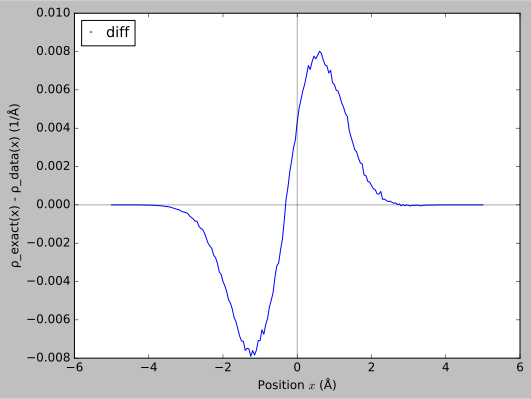

In [124]:
fig,ax = plt.subplots()

plt.plot(x, diff, label='diff')
ax.axhline(y=0, alpha=0.33, color='k')
ax.axvline(x=0, alpha=0.33, color='k')
ax.set_xlabel('Position $x$ (Å)')
ax.set_ylabel('ρ_exact(x) - ρ_data(x) (1/Å)')
ax.legend(loc='upper left', handlelength=0.5)
#plt.yscale('symlog')


## Now let's make a grid for all temperatures

In [125]:
colors = colortools.get_linear_colors('Spectral',len(T),reverse=True)
params = {'mfc':'None', 'elinewidth':0.5, 'marker':'o', 'ms':3, 'lw':0.75, 'ls':'None', 'mew':0.75}

IndexError: index 4 is out of bounds for axis 0 with size 4

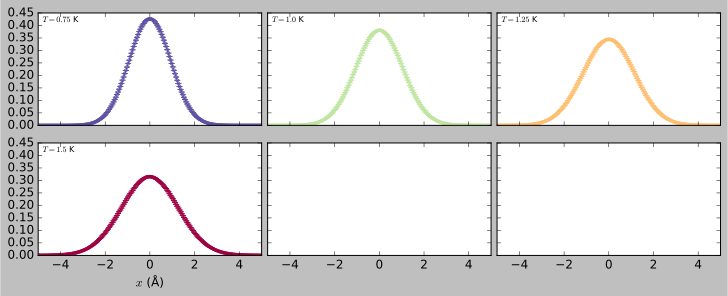

In [126]:
figsize = (10,4)
fig, axes = plt.subplots(nrows=2,ncols=3,sharex=True,sharey=True,constrained_layout=True,squeeze=True, figsize=figsize)
for i, ax in enumerate(axes.flat):
	cT = T[i]
	x, rhox, drhox = rho.epdata(rho.params[i])
	norm = scipy.integrate.simps(rhox,x)
	ax.errorbar(x+deltaX/2, rhox/norm, yerr=drhox, **params, label=f'QMC', mec=colors[i], ecolor=colors[i])
	ax.plot(_x, rho_exact(_x,cT), '-', lw=1, color=colors[i], label='Exact')
	ax.set_xlim(-5,5)
	ax.text(0.02, 0.92, f'$T={cT}$ K', transform=ax.transAxes, fontsize=8)
	if i > 2:
		ax.set_xlabel('$x$ (Å)')

axes[0,0].set_ylabel(r'$\rho(x)$  (1/Å)')
axes[1,0].set_ylabel(r'$\rho(x)$  (1/Å)');

plt.savefig(plot_dir + f'rho_vs_xT_SHO_N{sim_params["N"]}.png', dpi=300)

## Quantifying with $\chi^2$

In [127]:
chi2 = []
for iT, cT in enumerate(T):
	x, rhox, drhox = rho.epdata(rho.params[iT])
	norm = scipy.integrate.simps(rhox,x)
	x += deltaX/2
	chi2.append(np.average(((rho_exact(x,cT) - rhox/norm))**2))

chi2 = np.array(chi2)

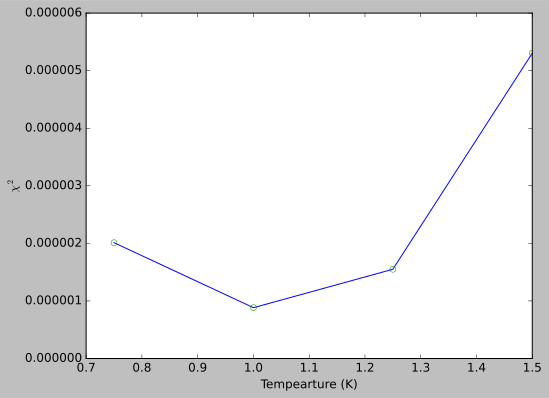

In [128]:
plt.plot(T,chi2)
plt.plot(T,chi2,'o',fillstyle='none')
plt.ylabel(r'$\chi^2$')
plt.xlabel('Tempearture (K)')
#plt.yscale("symlog")
plt.savefig(plot_dir + f'chi2_vs_T_SHO_N{sim_params["N"]}.png',dpi=300)